# Tanzania - Cloud Filtered Mosaics

In [1]:
# Supress Warning 
import warnings
warnings.filterwarnings('ignore')
import datacube
dc = datacube.Datacube(app = 'my_app')

In [2]:
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi()

# Select Landsat-7 or Landsat-8

In [3]:
# platform = "LANDSAT_7"
# product = "ls7_usgs_sr_scene"

platform = "LANDSAT_8"
product = "ls8_usgs_sr_scene"

# Select a smaller region for your analysis and the time extent

In [4]:
time_extents = ('2017-01-01', '2018-01-01')

# ITISO Region
# latitude_extents = (-5.899, -5.365)
# longitude_extents = (35.665, 36.317)

# PAHI Region
# latitude_extents = (-4.966, -4.394)
# longitude_extents = (35.783, 36.353)

# Dodoma Region
latitude_extents = (-6.227, -6.136)
longitude_extents = (35.702, 35.804)

In [5]:
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude = latitude_extents, longitude = longitude_extents)

## Load the dataset and the required spectral bands or other parameters

In [6]:
landsat_dataset = dc.load(latitude = latitude_extents,
                          longitude = longitude_extents,
                          platform = platform,
                          time = time_extents,
                          product = product,
                          output_crs = 'EPSG:4326', resolution =(-0.0003, 0.0003),
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']) 

In [7]:
landsat_dataset

<xarray.Dataset>
Dimensions:    (latitude: 304, longitude: 341, time: 41)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-10T07:44:33.800477 ... 2017-12-28T07:44:57.210157
  * latitude   (latitude) float64 -6.136 -6.136 -6.137 ... -6.226 -6.227 -6.227
  * longitude  (longitude) float64 35.7 35.7 35.7 35.7 ... 35.8 35.8 35.8 35.8
Data variables:
    red        (time, latitude, longitude) int16 4209 4069 3937 ... -9999 -9999
    green      (time, latitude, longitude) int16 3984 3823 3707 ... -9999 -9999
    blue       (time, latitude, longitude) int16 3833 3650 3505 ... -9999 -9999
    nir        (time, latitude, longitude) int16 4894 4778 4670 ... -9999 -9999
    swir1      (time, latitude, longitude) int16 4722 4630 4607 ... -9999 -9999
    swir2      (time, latitude, longitude) int16 3994 3901 3857 ... -9999 -9999
    pixel_qa   (time, latitude, longitude) uint16 480 480 480 480 ... 1 1 1 1
Attributes:
    crs:      EPSG:4326

>### Masking out Clouds

In [8]:
import xarray as xr  
import numpy as np

In [9]:
from utils.data_cube_utilities.clean_mask import landsat_qa_clean_mask
cloud_mask = landsat_qa_clean_mask(landsat_dataset, platform=platform)
cleaned_dataset = landsat_dataset.where(cloud_mask)


> **Median Mosaic**  
>  Masks clouds from imagery using the median valued cloud-free pixels in the time series  

In [10]:
from utils.data_cube_utilities.dc_mosaic import create_median_mosaic
median_composite = create_median_mosaic(cleaned_dataset, cloud_mask)

In [11]:
from utils.data_cube_utilities.dc_rgb import rgb

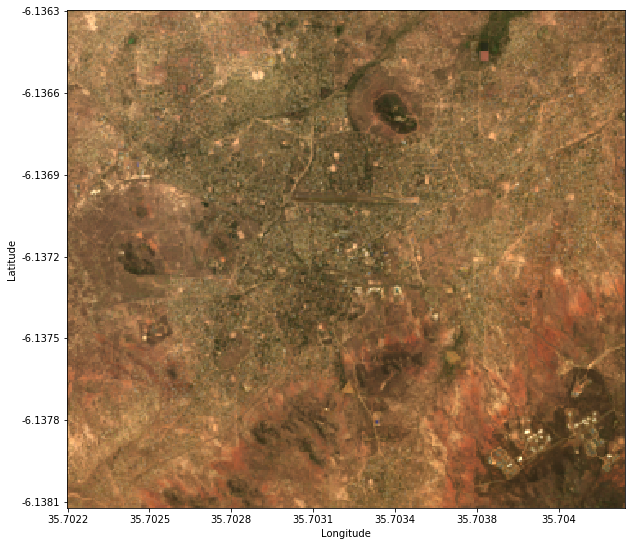

In [12]:
rgb(median_composite)
# rgb(median_composite, bands = ["nir","swir1","blue"])

> **Most Recent Mosaic**  
>  Masks clouds from imagery using the most recent cloud-free pixels in the time series  

In [13]:
from utils.data_cube_utilities.dc_mosaic import create_mosaic
most_recent_composite = create_mosaic(cleaned_dataset, cloud_mask)

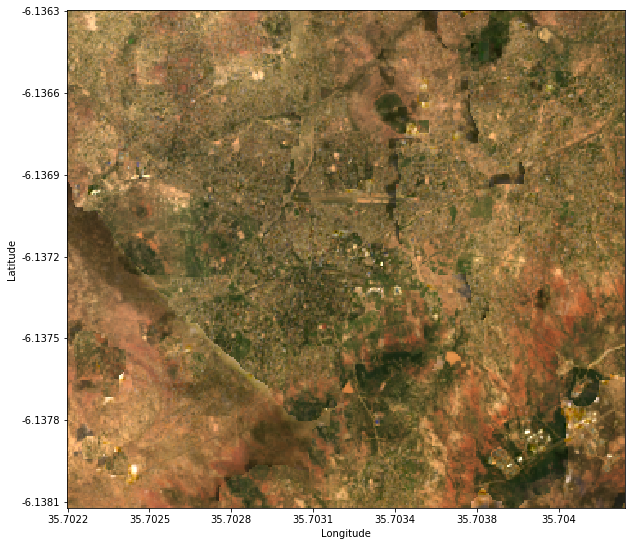

In [14]:
rgb(most_recent_composite)

> **Max NDVI Mosaic**  
>  Masks clouds from imagery using the Max NDVI across time for cloud-free pixels in the time series  

In [15]:
from utils.data_cube_utilities.dc_mosaic import create_max_ndvi_mosaic
max_ndvi_composite = create_max_ndvi_mosaic(cleaned_dataset, xr.DataArray(cloud_mask))

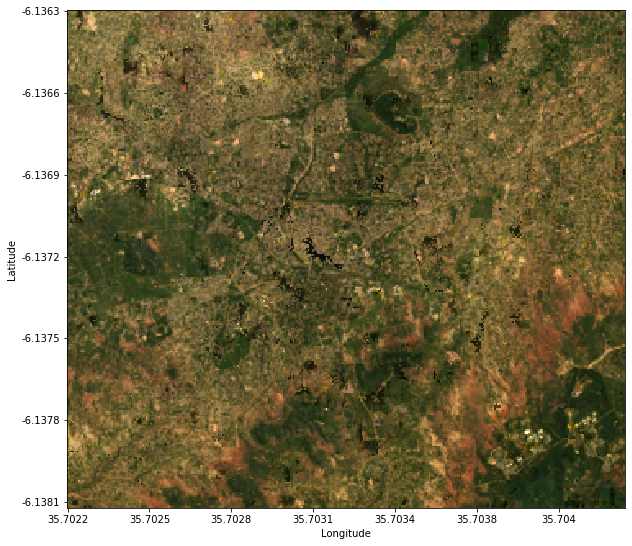

In [16]:
rgb(max_ndvi_composite)
# rgb(max_ndvi_composite, bands = ["nir","swir1","blue"])